In [1]:
from astropy.table import Table
import pylab as pl
import numpy as np
import pandas as pd

In [2]:
params = {'legend.fontsize': '20',
          'figure.figsize': (10, 10),
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20',
         'axes.labelpad' : '20'}
pl.rcParams.update(params)

In [3]:
data = Table.read('../../data/gama_gold_ddp.fits')

In [4]:
data.keys()

['CATAID',
 'OBJID',
 'RA',
 'DEC',
 'R_PETRO',
 'ZGAMA',
 'NQ',
 'SPECID',
 'SURVEY_CLASS',
 'UMAG_DRED_SDSS',
 'GMAG_DRED_SDSS',
 'RMAG_DRED_SDSS',
 'IMAG_DRED_SDSS',
 'ZMAG_DRED_SDSS',
 'ZSURV',
 'LUMDIST',
 'DISTMOD',
 'FIELD',
 'IN_D8LUMFN',
 'CONSERVATIVE',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'ROTCARTESIAN_X',
 'ROTCARTESIAN_Y',
 'ROTCARTESIAN_Z',
 'GMR',
 'DETMAG',
 'REST_GMR_0P1',
 'REST_GMR_0P1_WARN',
 'REST_GMR_0P1_INDEX',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'Q_COLOR_0P0',
 'EQ_ALL_0P0',
 'EQ_COLOR_0P0',
 'MALL_0P0',
 'MCOLOR_0P0',
 'MQZERO_0P0',
 'Z_THETA_QALL',
 'Z_THETA_QZERO',
 'Z_THETA_QCOLOR',
 'DDPKCORR_R0P1',
 'DDPKCORR_G0P1',
 'DDPKCORR_R0P0',
 'DDPKCORR_G0P0',
 'DDPMALL_0P0',
 'DELTA_DETMAG_FAINT',
 'ZMAX',
 'ZMAX_WARN',
 'DELTA_DETMAG_BRIGHT',
 'ZMIN',
 'ZMIN_WARN',
 'VMAX',
 'DDP',
 'DDPZLIMS',
 'STEPWISE_FAINTLIM_0P0',
 'STEPWISE_BRIGHTLIM_0P0']

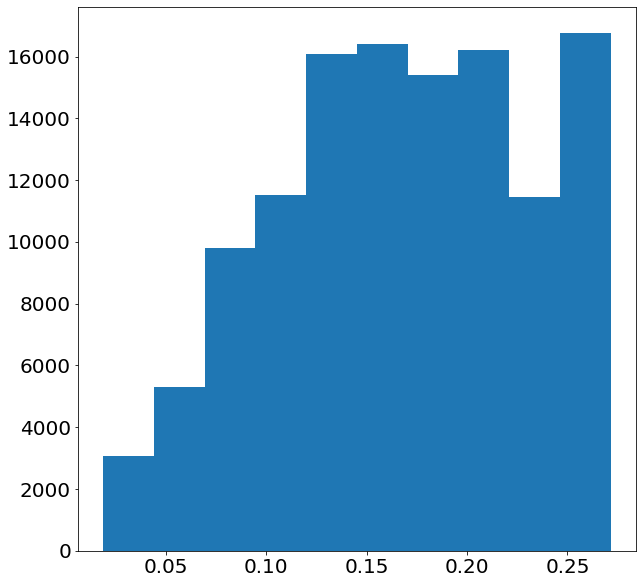

In [5]:
_ = pl.hist(data['ZGAMA'])

In [84]:
rot_xyz_labels = ['ROTCARTESIAN_X','ROTCARTESIAN_Y','ROTCARTESIAN_Z']
df_pos = data[rot_xyz_labels].to_pandas()
rot_xyz = np.array(df_pos)

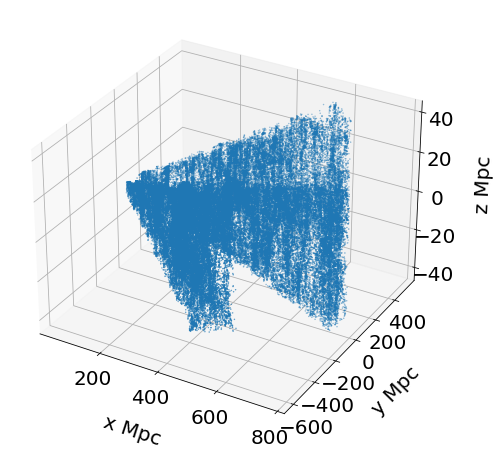

In [85]:
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.scatter3D(rot_xyz[:,0], rot_xyz[:,1], rot_xyz[:,2], s=0.2)
ax.set_xlabel('x Mpc')
ax.set_ylabel('y Mpc')
ax.set_zlabel('z Mpc')
pl.show()

In [86]:
idx = np.arange(0,len(rot_xyz))
df_rot = pd.DataFrame(np.c_[idx,rot_xyz])

In [87]:
np.savetxt('./data/GAMA_rotpos.txt', df_rot.values, fmt='%d', header='id px py pz')

## Filtering for DDP1 & FIELD

In [88]:
# np.unique(data['FIELD'])

In [89]:
G15 = np.array(data['FIELD'], dtype=str)
ii_G15 = G15 == 'G15'
ii_G15

array([False, False,  True, ..., False,  True, False])

In [90]:
DDP = np.array(data['DDP'])
ii_DDP1 = DDP[:,0] == 1 
df_pos_DDP1 = df_pos[ii_DDP1 & ii_G15]
rot_xyz_ddp1 = rot_xyz[ii_DDP1 & ii_G15]

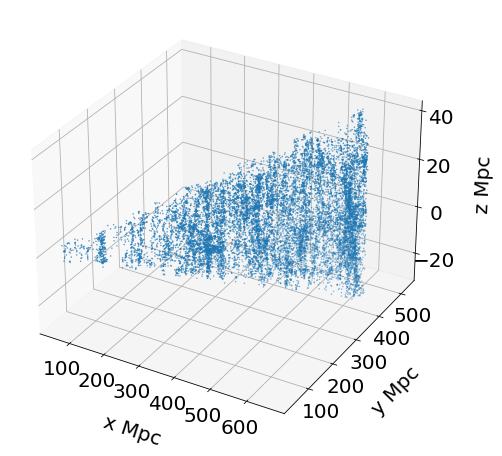

In [91]:
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.set_xlabel('x Mpc')
ax.set_ylabel('y Mpc')
ax.set_zlabel('z Mpc')
ax.scatter3D(rot_xyz_ddp1[:,0], rot_xyz_ddp1[:,1], rot_xyz_ddp1[:,2], s=0.2)

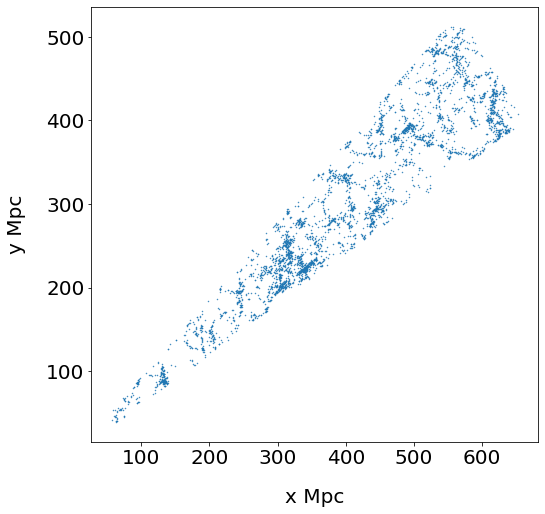

In [92]:
fig = pl.figure(figsize=(8,8), rasterized=True)
is_slice = (rot_xyz_ddp1[:,2]>-5) & (rot_xyz_ddp1[:,2]<5)
pl.scatter(rot_xyz_ddp1[:,0][is_slice], rot_xyz_ddp1[:,1][is_slice], s=0.2)
pl.xlabel('x Mpc')
pl.ylabel('y Mpc')
pl.show()

In [93]:
idx = np.arange(0,len(rot_xyz_ddp1))
df_rot_ddp1 = pd.DataFrame(np.c_[idx,rot_xyz_ddp1])

In [94]:
np.savetxt('./data/GAMA_rotpos_ddp1_gr15.txt', df_rot_ddp1.values , fmt='%d', header='id px py pz')

In [100]:
f = open('./data/GAMA_rotpos_ddp1.txt.NDnet_s3.5.up.NDskl.S001.a.NDskl')
doc = f.readlines()

In [101]:
doc = np.array(doc)
ii = np.where(doc=='[FILAMENTS]\n')[0][0]
N_fila = int(doc[ii+1])
N_fila

1251

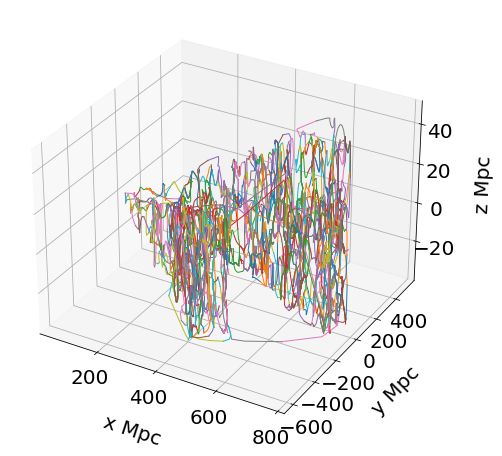

In [102]:
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.set_xlabel('x Mpc')
ax.set_ylabel('y Mpc')
ax.set_zlabel('z Mpc')
for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    # print(jj,jj_new)
    # print(doc[jj].replace('\n',''),doc[jj_new])
    ax.plot3D(FILA[i][:,0], FILA[i][:,1], FILA[i][:,2], lw=1) 
    jj = jj_new

pl.savefig('./figs/GAMA_rotpos_ddp1.pdf', bbox_inches='tight')
pl.show()

In [107]:
f = open('./data/GAMA_rotpos_ddp1_gr15.txt.NDnet_s3.5.up.NDskl.S001.a.NDskl')
doc = f.readlines()

In [108]:
doc = np.array(doc)
ii = np.where(doc=='[FILAMENTS]\n')[0][0]
N_fila = int(doc[ii+1])
N_fila

363

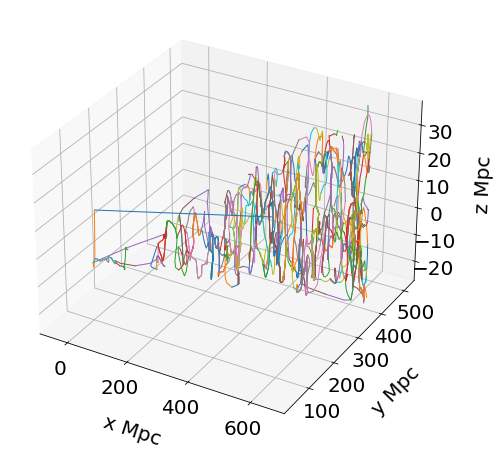

In [109]:
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.set_xlabel('x Mpc')
ax.set_ylabel('y Mpc')
ax.set_zlabel('z Mpc')
for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    # print(jj,jj_new)
    # print(doc[jj].replace('\n',''),doc[jj_new])
    ax.plot3D(FILA[i][:,0], FILA[i][:,1], FILA[i][:,2], lw=1) 
    jj = jj_new

pl.savefig('./figs/GAMA_rotpos_ddp1_gr15_3D.pdf', bbox_inches='tight')
pl.show()

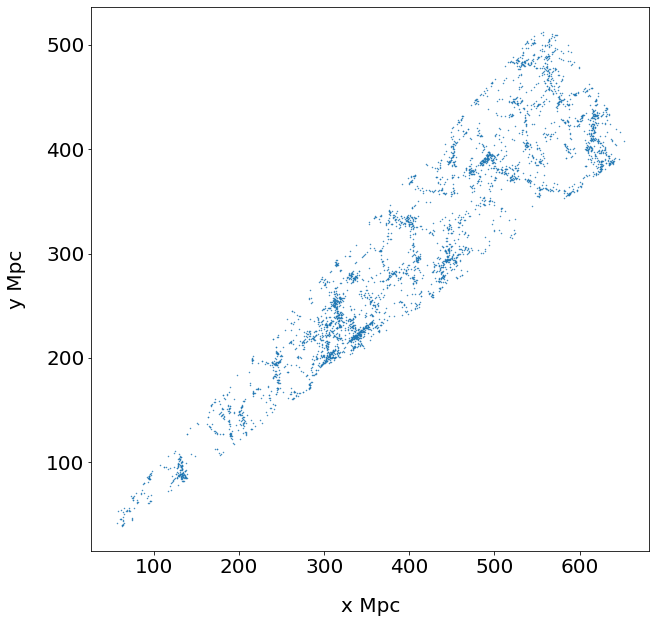

In [113]:
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(10,10), rasterized=True)
# for i in range(N_fila):
#     jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
#     FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
#     # is_slice = (FILA[i][:,2]<5) & (FILA[i][:,2]>-5)
#     # print(jj,jj_new)
#     # print(doc[jj].replace('\n',''),doc[jj_new])
#     # pl.plot(FILA[i][:,0][is_slice], FILA[i][:,1][is_slice], lw=1) 
#     pl.plot(FILA[i][:,0], FILA[i][:,1], lw=1) 
#     jj = jj_new

is_slice = (rot_xyz_ddp1[:,2]>-5) & (rot_xyz_ddp1[:,2]<5)
pl.scatter(rot_xyz_ddp1[:,0][is_slice], rot_xyz_ddp1[:,1][is_slice], s=0.2)
pl.xlabel('x Mpc')
pl.ylabel('y Mpc')
# pl.savefig('./figs/GAMA_rotpos_ddp1_gr15_2D.pdf', bbox_inches='tight')
pl.show()

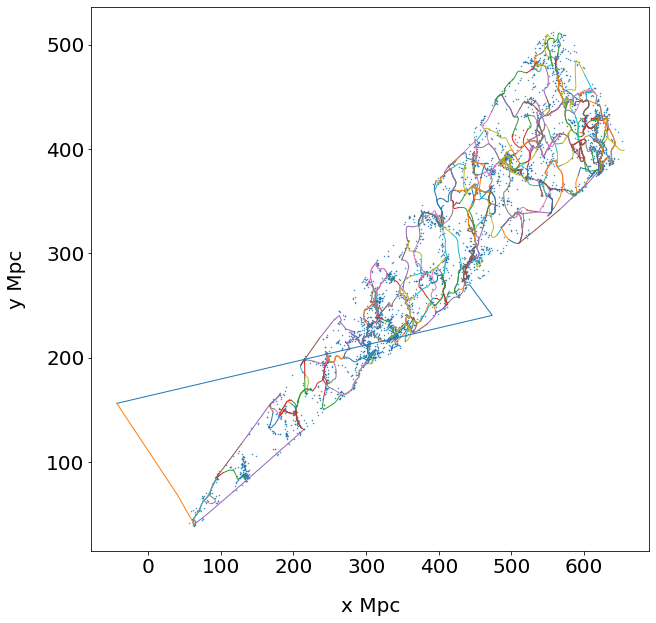

In [114]:
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(10,10), rasterized=True)
for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    # is_slice = (FILA[i][:,2]<5) & (FILA[i][:,2]>-5)
    # print(jj,jj_new)
    # print(doc[jj].replace('\n',''),doc[jj_new])
    # pl.plot(FILA[i][:,0][is_slice], FILA[i][:,1][is_slice], lw=1) 
    pl.plot(FILA[i][:,0], FILA[i][:,1], lw=1) 
    jj = jj_new

is_slice = (rot_xyz_ddp1[:,2]>-5) & (rot_xyz_ddp1[:,2]<5)
pl.scatter(rot_xyz_ddp1[:,0][is_slice], rot_xyz_ddp1[:,1][is_slice], s=0.2)
pl.xlabel('x Mpc')
pl.ylabel('y Mpc')
pl.savefig('./figs/GAMA_rotpos_ddp1_gr15_2D.pdf', bbox_inches='tight')
pl.show()

In [115]:
f = open('./data/GAMA_rotpos_ddp1_gr15.txt.NDnet_s3.5.up.NDskl.S001.a.segs')
doc2 = f.readlines()
f.close()

In [71]:
N_segs = int(doc2[2].replace('\n','').split(' ')[1])
N_segs

8489

In [72]:
SEGMENTS_SRT = np.array(doc2)[3:]

In [73]:
SEGMENTS = np.array([np.array(f.split(' '), dtype=float) for f in SEGMENTS_SRT])

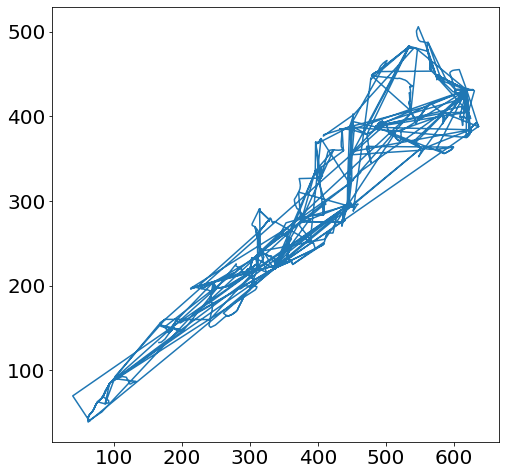

In [74]:
fig = pl.figure(figsize=(8,8), rasterized=True)

is_slice = (SEGMENTS[:,2]>-5) & (SEGMENTS[:,2]<5)
plot = pl.plot(SEGMENTS[:,0][is_slice], SEGMENTS[:,1][is_slice])
pl.show()